<a href="https://colab.research.google.com/github/sdr999/Analyzing-Student-Attributes-for-Career-Success/blob/main/Student_data_analysis_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing libraires**

In [8]:
pip install wget

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wget
import requests

#**Loading dataset**

In [10]:
# Define the URL of the CSV file on GitHub
csv_file_url = "https://raw.githubusercontent.com/sdr999/Analyzing-Student-Attributes-for-Career-Success/main/Data%20analyst%20Data.csv"

# Download the CSV file
response = requests.get(csv_file_url)
with open("Data_analyst_Data.csv", "wb") as file:
    file.write(response.content)

# Read the CSV file using pandas
data = pd.read_csv("Data_analyst_Data.csv")

# Display the content of the CSV file
data.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills,Average cgpa=,8.038475685
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7 Lakh+,6,yes,NaN,NaN
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,0-2 Lakh,7,no,NaN,NaN
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,5-7 Lakh,7,no,NaN,NaN
3,Pooja,pooja@xyz.com,1,Art of Resume Building,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,2-5 Lakh,8,no,NaN,NaN
4,Aayush,aayush@xyz.com,1,Art of Resume Building,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,0-2 Lakh,10,yes,NaN,NaN


In [11]:
# Load the dataset
#data = pd.read_excel("/content/Data analyst Data.xlsx")

#**Data Cleaning**

In [12]:
data.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Events                                                                0
Attendee Status                                                       0
College Name                                                         15
How did you come to know about this event?                         2216
Specify in "Others" (how did you come to know about this event)    4805
Designation                                                           0
Year of Graduation                                                    0
City                                                                  0
CGPA                                                                  0
Experience with python (Months)                                       0
Family Income                                                   

**Removing empty rows**

In [13]:
column_name = "How did you come to know about this event?"
data = data.dropna(subset=[column_name])
data.replace(pd.NA, "", inplace=True)

<ipython-input-13-7e7f48e9003d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(pd.NA, "", inplace=True)


In [14]:
data.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Events                                                                0
Attendee Status                                                       0
College Name                                                          0
How did you come to know about this event?                            0
Specify in "Others" (how did you come to know about this event)       0
Designation                                                           0
Year of Graduation                                                    0
City                                                                  0
CGPA                                                                  0
Experience with python (Months)                                       0
Family Income                                                   

**Converting to lowercase**

In [15]:
# Convert 'How did you come to know about this event?', 'College Name','Specify in "Others" (how did you come to know about this event)' to lowercase for case-insensitive comparison
data['How did you come to know about this event?'] = data['How did you come to know about this event?'].str.lower()
data['College Name'] = data['College Name'].str.lower()
data['Specify in "Others" (how did you come to know about this event)'] = data['Specify in "Others" (how did you come to know about this event)'].str.lower()


<ipython-input-15-0acd4ef42733>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['How did you come to know about this event?'] = data['How did you come to know about this event?'].str.lower()
<ipython-input-15-0acd4ef42733>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['College Name'] = data['College Name'].str.lower()
<ipython-input-15-0acd4ef42733>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

**remove any leading/trailing spaces**

In [16]:
# Clean the "Leadership- skills" column (remove any leading/trailing spaces)
data["Leadership- skills"] = data["Leadership- skills"].str.strip()

<ipython-input-16-6de5745ea608>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Leadership- skills"] = data["Leadership- skills"].str.strip()


**Dealing with incompatible data**

In [17]:
# Clean and transform Family Income column
def parse_family_income_range(income_range):
    # print(income_range)
    if income_range == "7 Lakh+":
        return 7_00_000  # Assign a representative value for "7 Lakh+"
    elif "-" in income_range:
        income_range=income_range.replace("Lakh", "")
        min_income, max_income = income_range.split("-")
        return ((int(min_income) + int(max_income)) // 2)*1_00_000
    else:
        return None

data["Cleaned Family Income"] = data["Family Income"].apply(parse_family_income_range)

<ipython-input-17-738c17437ec1>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Cleaned Family Income"] = data["Family Income"].apply(parse_family_income_range)


**Replace 'Others' values with values from 'Specify in Others' column**

In [18]:
# Replace 'Others' values with values from 'Specify in Others' column
for index, row in data.iterrows():
    #print(index,row)
    if "Others" in row['How did you come to know about this event?']:
        other_value = row['Specify in "Others" (how did you come to know about this event)']
        if other_value:
            data.at[index, "How did you come to know about this event?"] =row['How did you come to know about this event?'].replace("Others", other_value)


#**1. How many unique students are included in the dataset?**

In [19]:
# 1. How many unique students are included in the dataset?
unique_students = data["Email ID"].nunique()
print("Number of unique students:", unique_students)

Number of unique students: 1531


#**2. What is the average GPA of the students?**

In [20]:
# 2. What is the average GPA of the students?
average_gpa = data["CGPA"].mean()
print("Average GPA of students:", average_gpa)

Average GPA of students: 8.039581777445855


#**3. What is the distribution of students across different graduation years?**

In [21]:
# 3. What is the distribution of students across different graduation years?
graduation_distribution = data["Year of Graduation"].value_counts()
print("Distribution of students across graduation years:\n", graduation_distribution)

Distribution of students across graduation years:
 2023    839
2024    830
2025    706
2026    303
Name: Year of Graduation, dtype: int64


#**4. What is the distribution of student's experience with Python programming?**

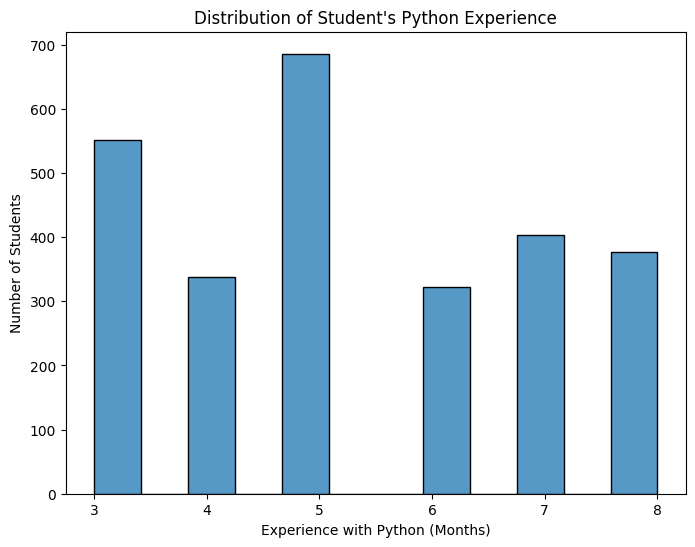

In [22]:
# 4. What is the distribution of student's experience with Python programming?
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Experience with python (Months)", bins=12)
plt.title("Distribution of Student's Python Experience")
plt.xlabel("Experience with Python (Months)")
plt.ylabel("Number of Students")
plt.show()

#**5. What is the average family income of the student?**

In [23]:
# 5. What is the average family income of the student?
mean_family_income = data["Cleaned Family Income"].mean()
print("Mean Family Income:", mean_family_income)

Mean Family Income: 116952.9499626587


#**6. How does the GPA vary among different colleges? (Show top 5 results only)**

In [24]:
# 6. How does the GPA vary among different colleges? (Show top 5 results only)
top_colleges = data.groupby("College Name")["CGPA"].mean().nlargest(5)
print("Top 5 colleges by average GPA:\n", top_colleges)

Top 5 colleges by average GPA:
 College Name
st xavier's college                                                               8.329885
ap shah institute of technology                                                   8.243750
chhattisgarh swami vivekananda technical university teaching department bhilai    8.229333
                                                                                  8.207143
b. k. birla college of arts, science & commerce (autonomous), kalyan              8.178519
Name: CGPA, dtype: float64


#**7. Are there any outliers in the quantity (number of courses completed) attribute?**

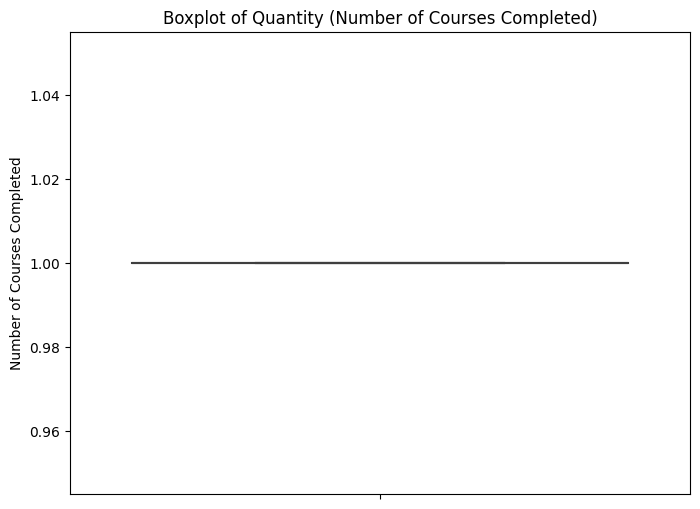

In [25]:
# 7. Are there any outliers in the quantity (number of courses completed) attribute?
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y="Quantity")
plt.title("Boxplot of Quantity (Number of Courses Completed)")
plt.ylabel("Number of Courses Completed")
plt.show()

#**8. What is the average GPA for students from each city?**

In [26]:
# 8. What is the average GPA for students from each city?
avg_gpa_by_city = data.groupby("City")["CGPA"].mean().sort_values(ascending=False)
print("Average GPA for students from each city:\n", avg_gpa_by_city)

Average GPA for students from each city:
 City
Kolhapur     8.637500
Puri         8.637500
Srinagar     8.612500
Gurugram     8.575000
Ballari      8.562500
               ...   
Solapur      7.387500
Vasai        7.362500
Daman        7.342857
Rewari       7.337500
New Delhi    7.314286
Name: CGPA, Length: 177, dtype: float64


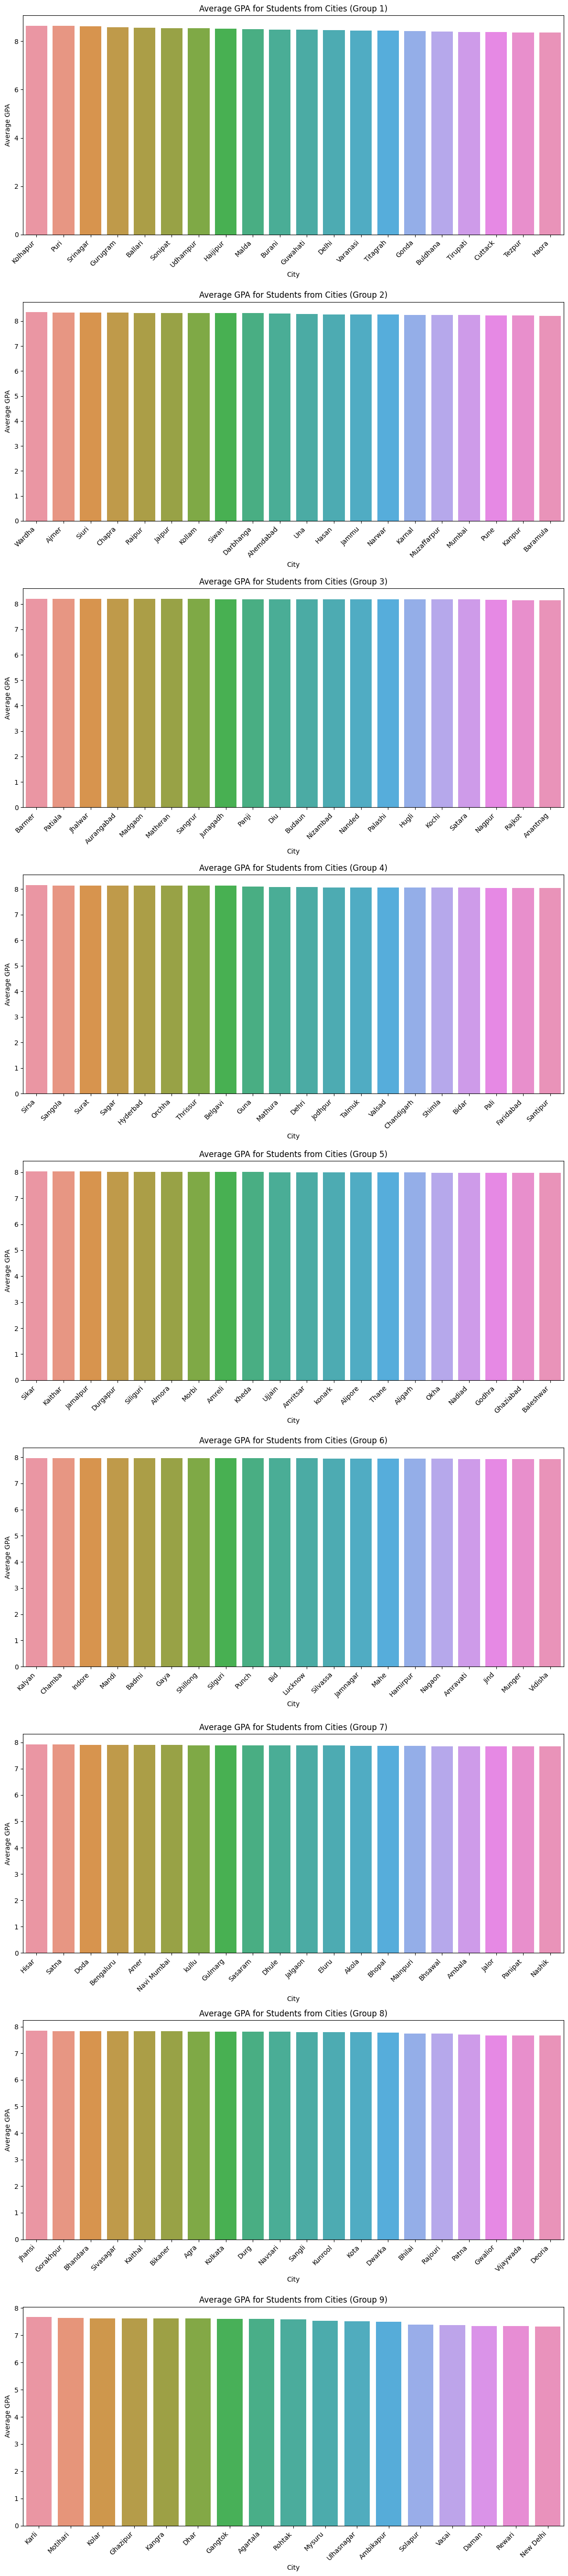

In [27]:
# Divide cities into groups of 20
city_groups = [avg_gpa_by_city[i:i+20] for i in range(0, len(avg_gpa_by_city), 20)]

# Create subplots for each group of cities
num_groups = len(city_groups)
fig, axes = plt.subplots(nrows=num_groups, ncols=1, figsize=(12, 6*num_groups))

# Plot each group of cities in a separate subplot
for i, (cities, ax) in enumerate(zip(city_groups, axes)):
    sns.barplot(x=cities.index, y=cities.values, ax=ax)
    ax.set_title(f"Average GPA for Students from Cities (Group {i+1})")
    ax.set_xlabel("City")
    ax.set_ylabel("Average GPA")
    ax.set_xticklabels(labels=cities.index, rotation=45, ha="right")

plt.tight_layout()
plt.show()

#**9. Can we identify any relationship between family income and GPA?**

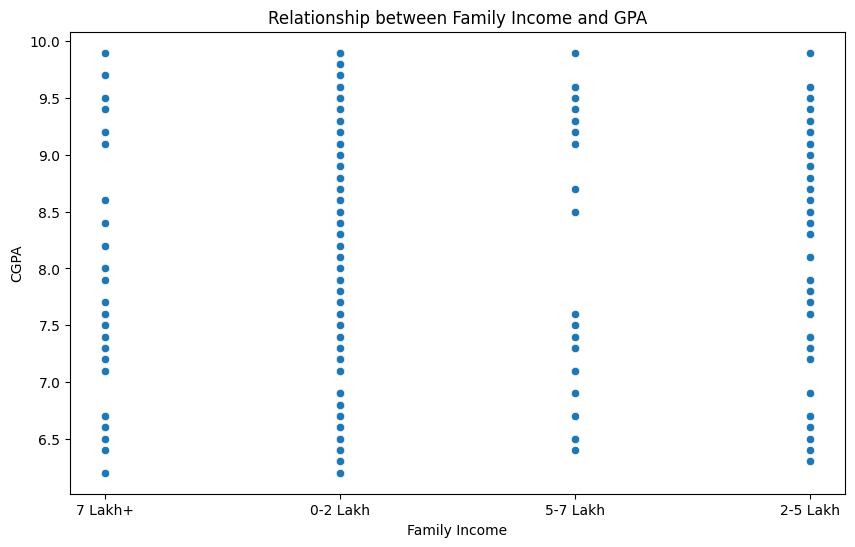

In [28]:
# 9. Can we identify any relationship between family income and GPA?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="Family Income", y="CGPA")
plt.title("Relationship between Family Income and GPA")
plt.xlabel("Family Income")
plt.ylabel("CGPA")
plt.show()

#**10. How many students from various cities? (Solve using data visualization tool).**

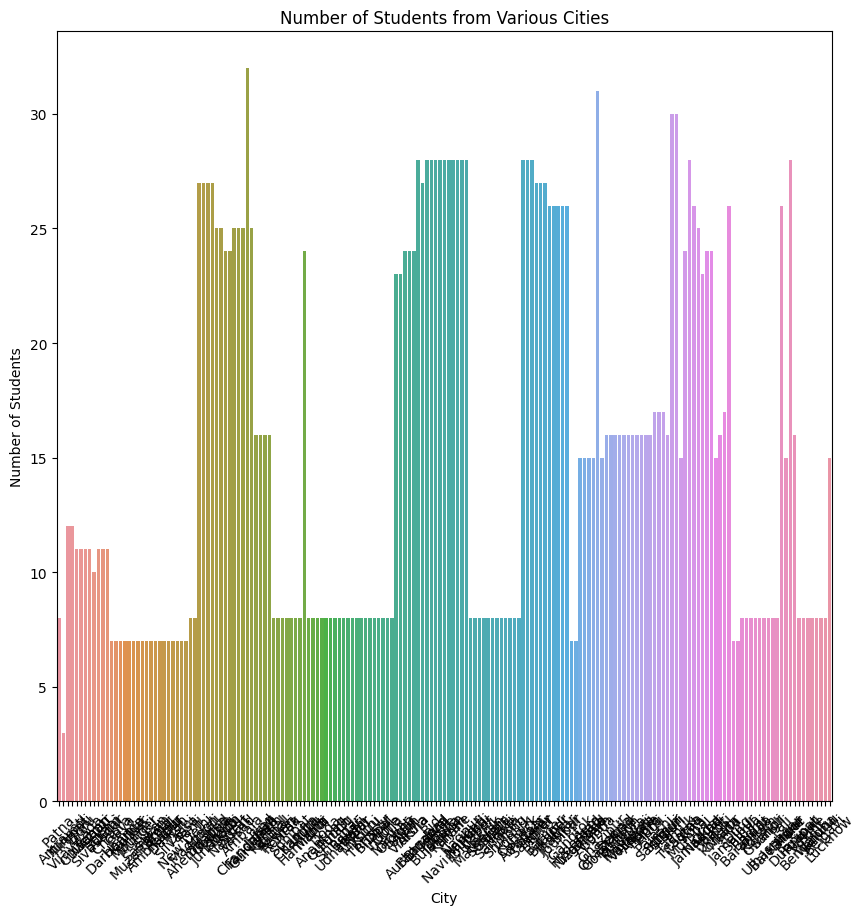

In [29]:
# 10. How many students from various cities? (Solve using data visualization tool).
plt.figure(figsize=(10, 10))
sns.countplot(data=data, x="City")
plt.title("Number of Students from Various Cities")
plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Students")
plt.show()

8


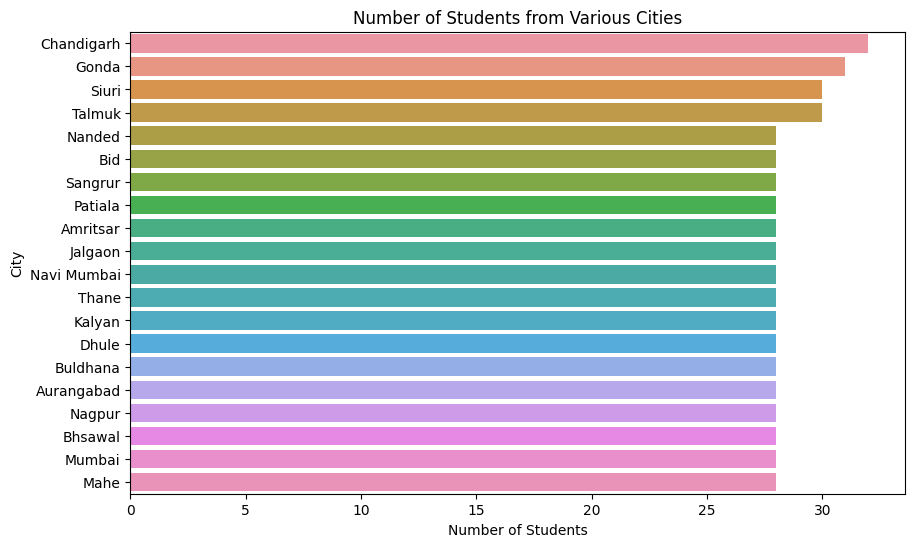

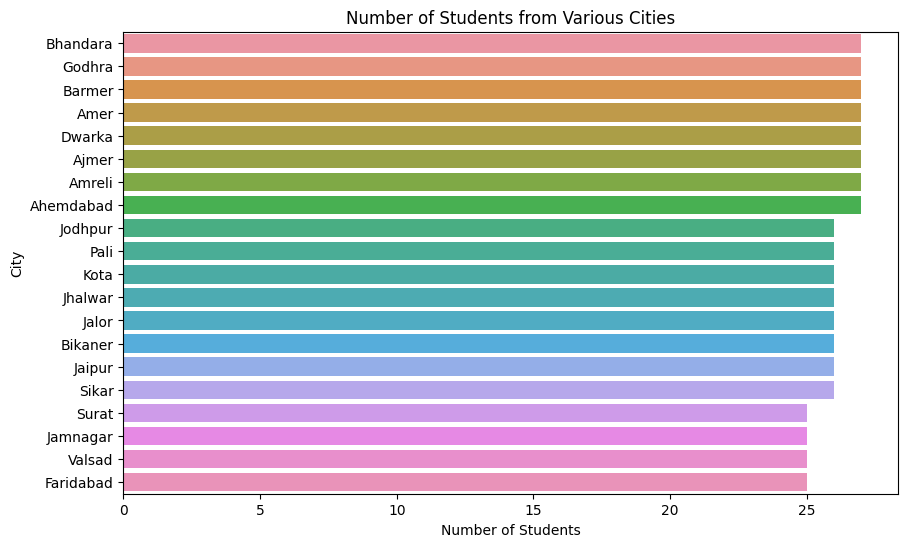

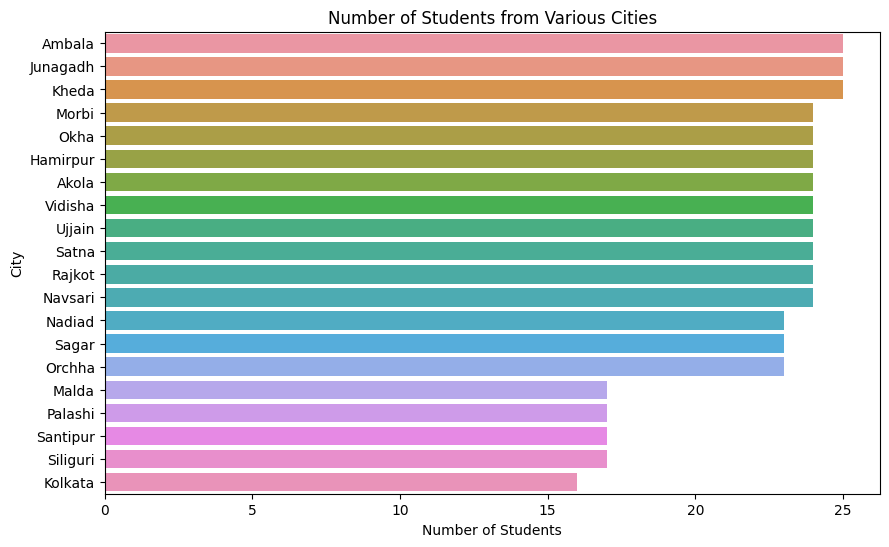

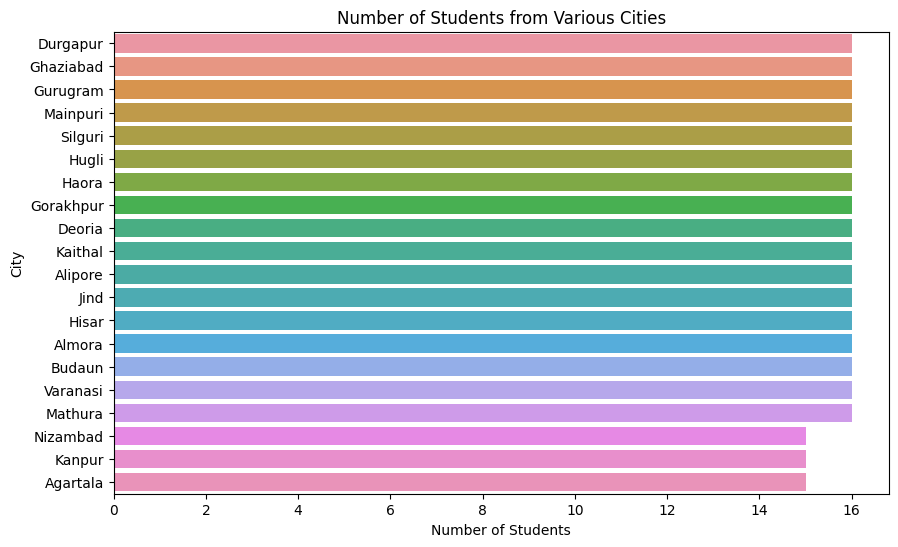

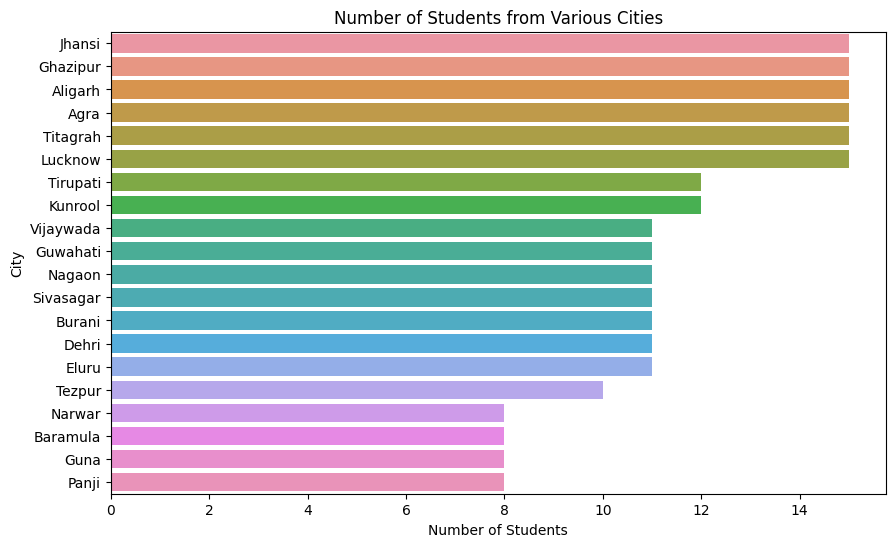

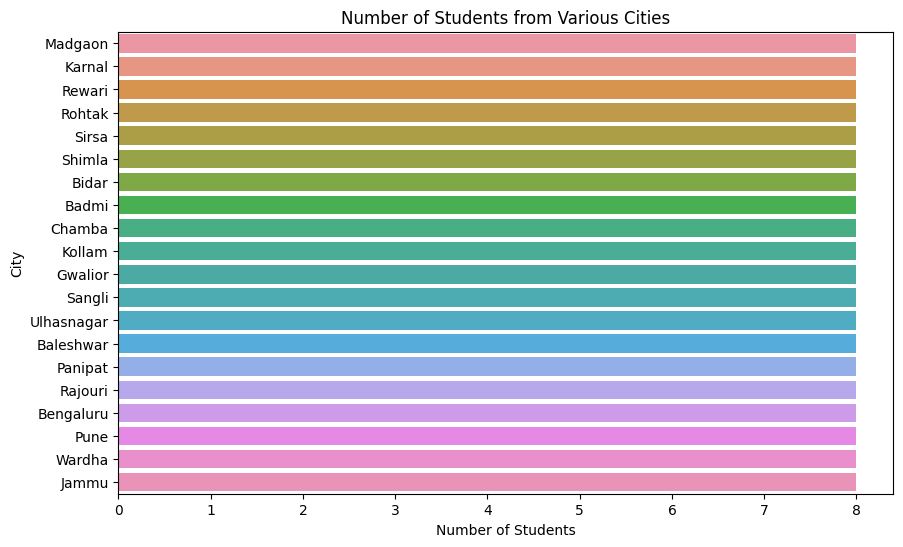

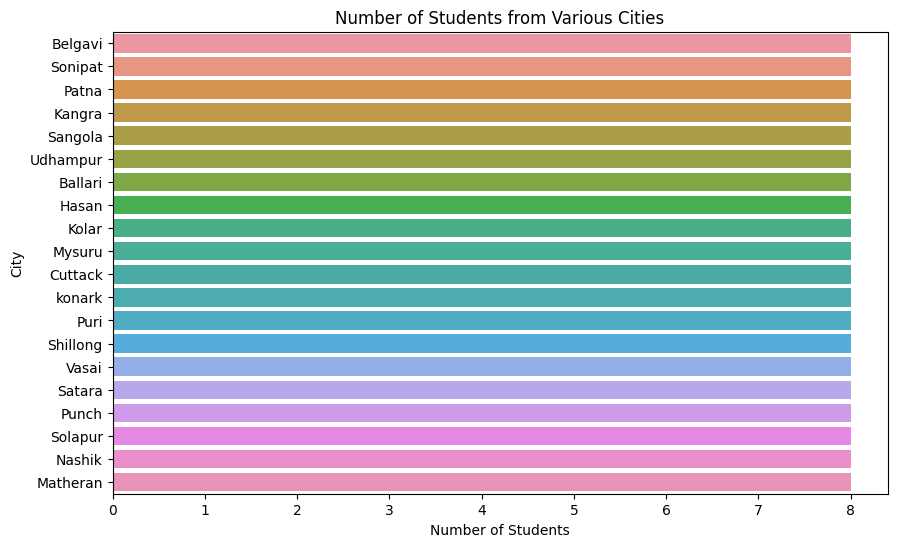

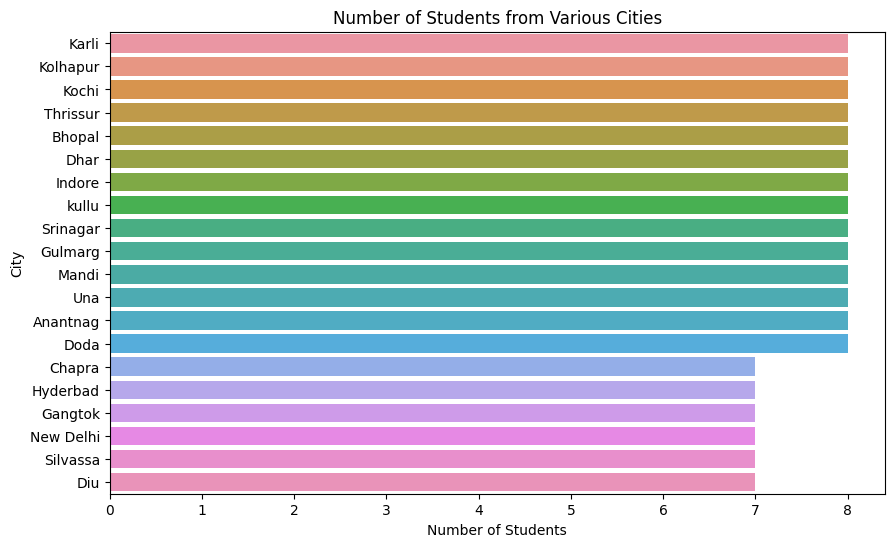

In [30]:
# Calculate the number of students from each city
city_counts = data["City"].value_counts()

# Choose the top N cities to display, and group the rest as "Other"
grp= len(city_counts)//20
print(grp)
# Create a new city count series with top cities and "Other" category
#filtered_city_counts = top_cities.append(pd.Series([other_cities], index=["Other"]))
for i in range(grp):
    # Plot using a horizontal bar plot
    top_n=20
    top_cities = city_counts[i*top_n:(i+1)*top_n]
    plt.figure(figsize=(10, 6))
    #sns.barplot(x=filtered_city_counts, y=filtered_city_counts.index)
    sns.barplot(x=top_cities, y=top_cities.index)
    plt.title("Number of Students from Various Cities")
    plt.xlabel("Number of Students")
    plt.ylabel("City")
    plt.show()

#**11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python (Months)'?**

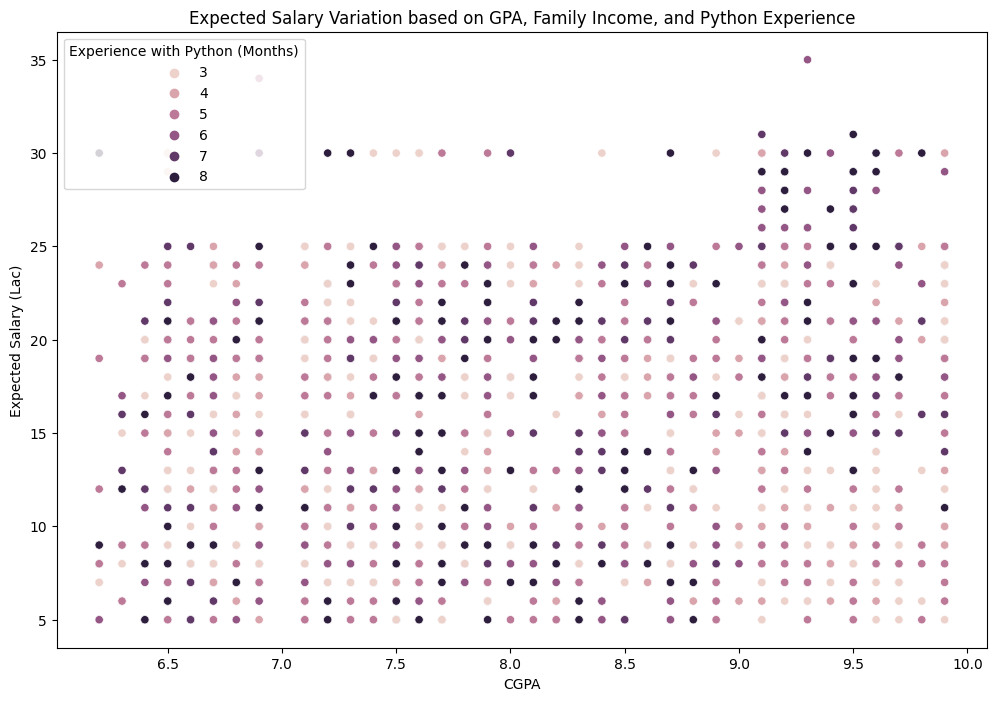

In [31]:
# 11. How does the expected salary vary based on factors like 'GPA', 'Family income', 'Experience with python (Months)'?
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="CGPA", y="Expected salary (Lac)", hue="Experience with python (Months)")
plt.title("Expected Salary Variation based on GPA, Family Income, and Python Experience")
plt.xlabel("CGPA")
plt.ylabel("Expected Salary (Lac)")
plt.legend(title="Experience with Python (Months)")
plt.show()

#**12. Which event tend to attract more students from specific fields of study?**

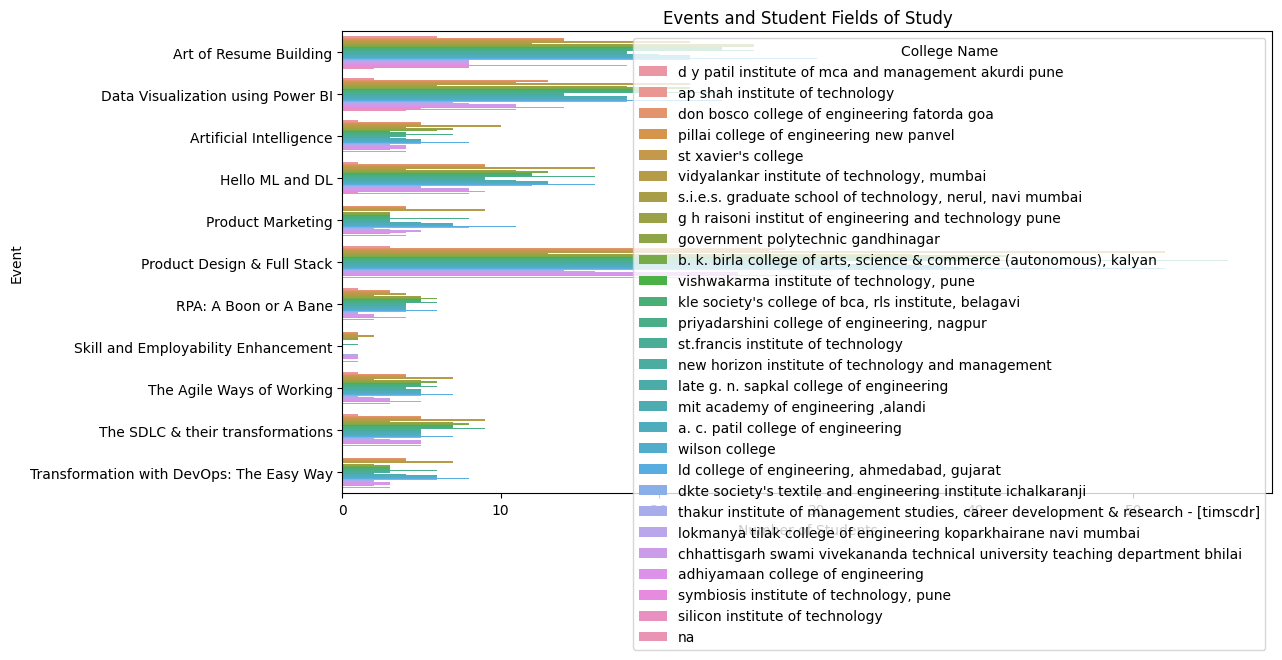

In [32]:
# 12. Which event tend to attract more students from specific fields of study?
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y="Events", hue="College Name")
plt.title("Events and Student Fields of Study")
plt.xlabel("Number of Students")
plt.ylabel("Event")
plt.legend(title="College Name")
plt.show()


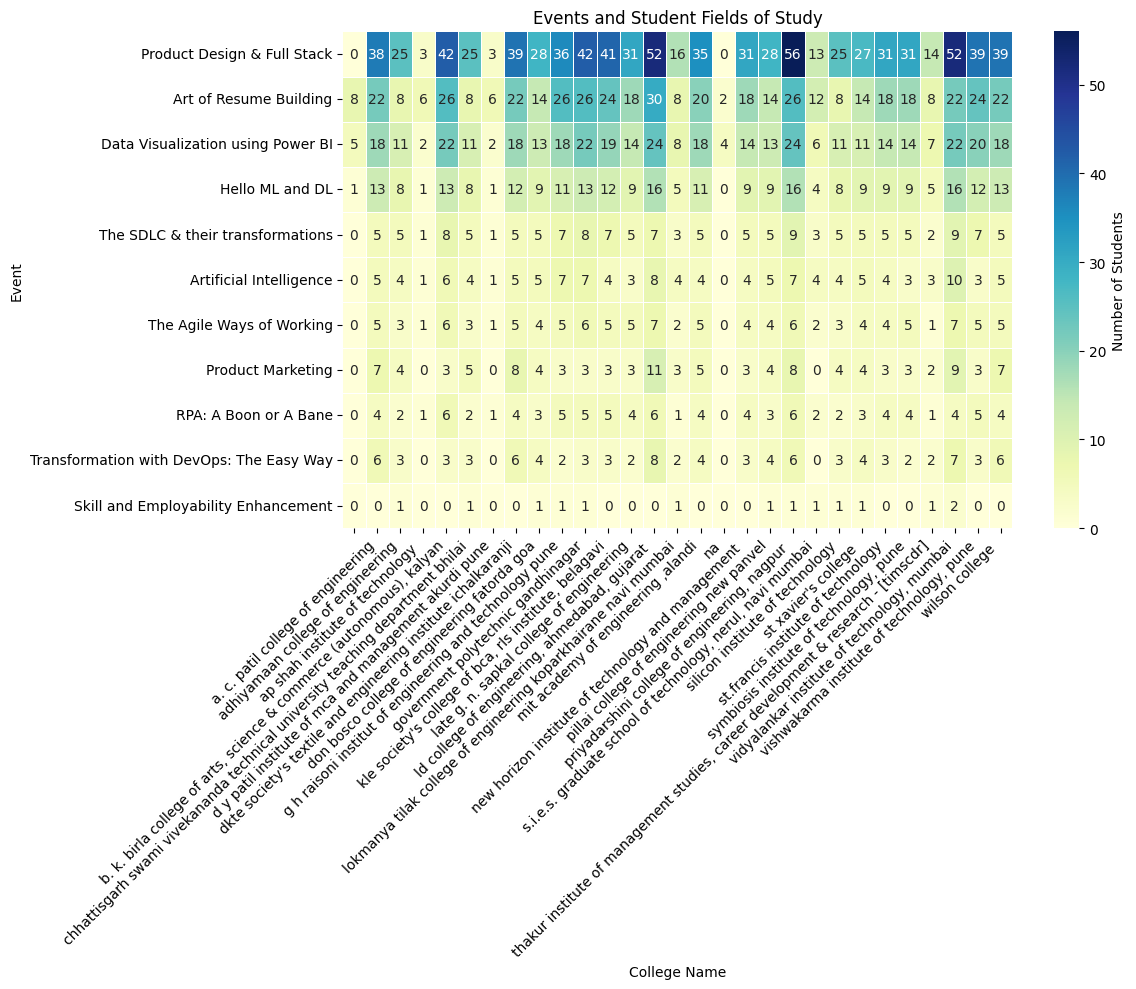

In [33]:
# Create a crosstab of events and college names
event_college_crosstab = pd.crosstab(data["Events"], data["College Name"])

# Sort events based on total count of students
sorted_events = event_college_crosstab.sum(axis=1).sort_values(ascending=False).index

# Plot using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data=event_college_crosstab.loc[sorted_events],
            cmap="YlGnBu",
            annot=True,
            fmt="d",
            linewidths=0.5,
            cbar_kws={'label': 'Number of Students'})
plt.title("Events and Student Fields of Study")
plt.xlabel("College Name")
plt.ylabel("Event")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<ipython-input-34-f4b3f9e5b35e>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

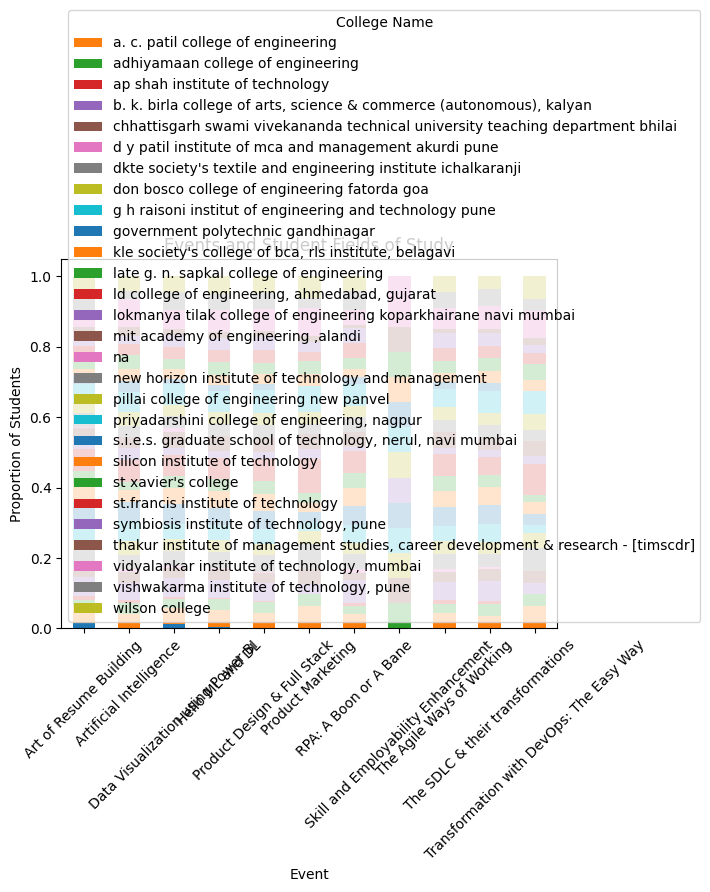

In [34]:
# Create a crosstab of events and college names
event_college_crosstab = pd.crosstab(data["Events"], data["College Name"])

# Normalize the crosstab to show proportions
event_college_normalized = event_college_crosstab.div(event_college_crosstab.sum(axis=1), axis=0)

# Plot using a grouped bar plot
plt.figure(figsize=(12, 8))
event_college_normalized.plot(kind="bar", stacked=True)
plt.title("Events and Student Fields of Study")
plt.xlabel("Event")
plt.ylabel("Proportion of Students")
plt.xticks(rotation=45)
plt.legend(title="College Name")
plt.tight_layout()
plt.show()


#**13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?**

**a boxplot**

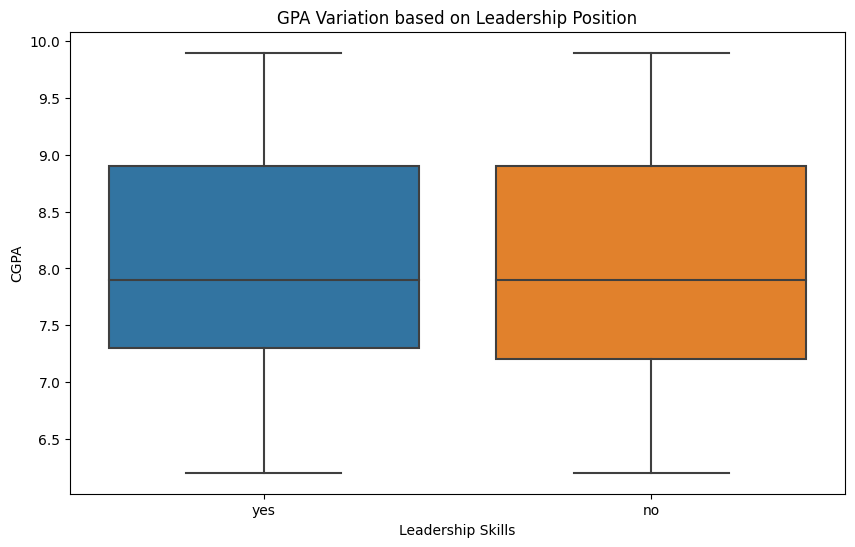

In [35]:
# 13. Do students in leadership positions during their college years tend to have higher GPAs or better expected salary?
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Leadership- skills", y="CGPA")
plt.title("GPA Variation based on Leadership Position")
plt.xlabel("Leadership Skills")
plt.ylabel("CGPA")
plt.show()

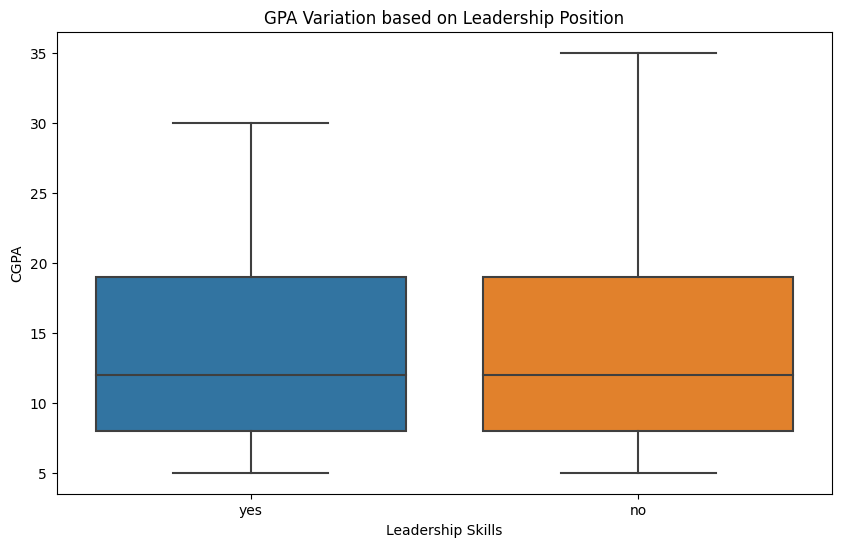

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="Leadership- skills", y="Expected salary (Lac)")
plt.title("GPA Variation based on Leadership Position")
plt.xlabel("Leadership Skills")
plt.ylabel("CGPA")
plt.show()

**a violin plot**

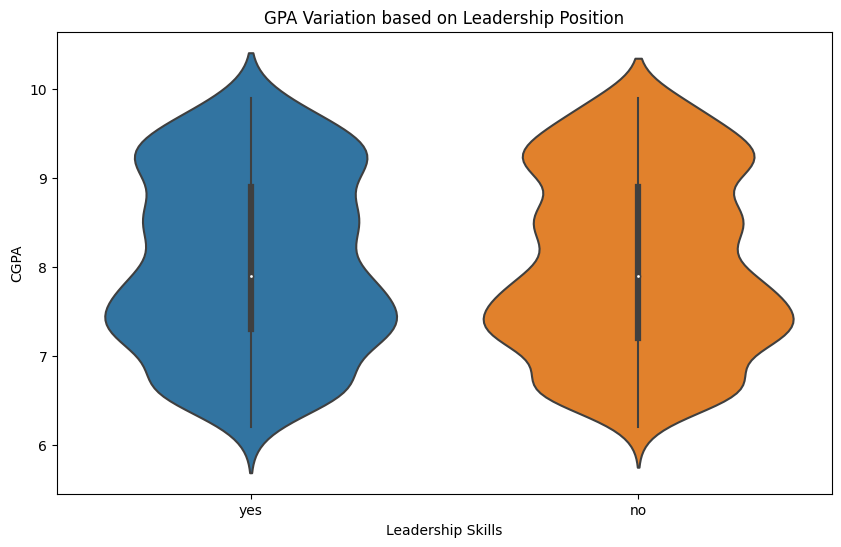

In [36]:
# Plot using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x="Leadership- skills", y="CGPA")
plt.title("GPA Variation based on Leadership Position")
plt.xlabel("Leadership Skills")
plt.ylabel("CGPA")
plt.show()

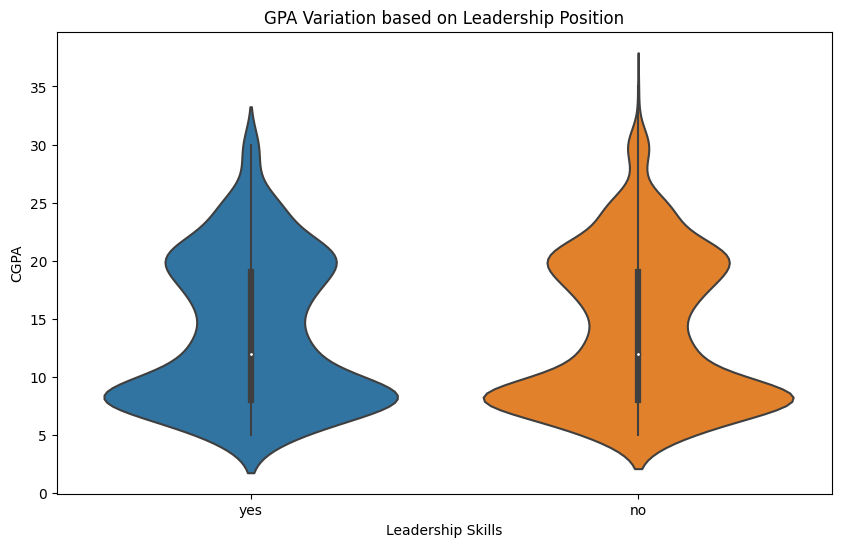

In [45]:
# Plot using a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x="Leadership- skills", y="Expected salary (Lac)")
plt.title("GPA Variation based on Leadership Position")
plt.xlabel("Leadership Skills")
plt.ylabel("Expected salary (Lac)")
plt.show()

**a swarm plot**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


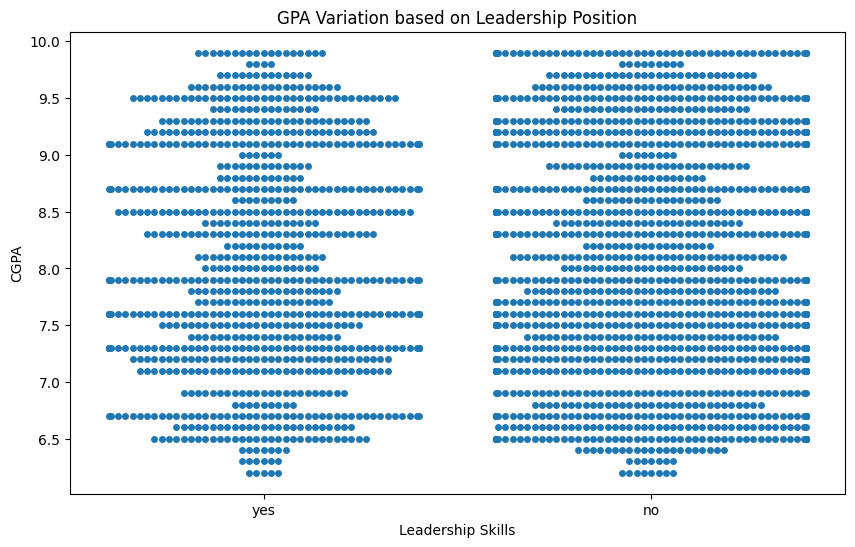

In [37]:
# Plot using a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x="Leadership- skills", y="CGPA")
plt.title("GPA Variation based on Leadership Position")
plt.xlabel("Leadership Skills")
plt.ylabel("CGPA")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 49.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


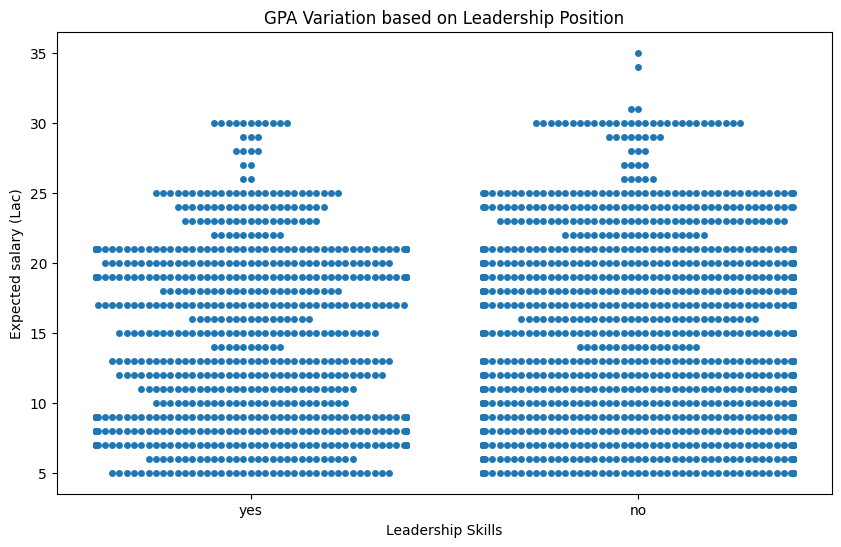

In [46]:
# Plot using a swarm plot
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x="Leadership- skills", y="Expected salary (Lac)")
plt.title("GPA Variation based on Leadership Position")
plt.xlabel("Leadership Skills")
plt.ylabel("Expected salary (Lac)")
plt.show()

#**14. How many students are graduating by the end of 2024?**

In [38]:
# 14. How many students are graduating by the end of 2024?
current_year = 2023
graduating_students = data[data["Year of Graduation"] <= 2024]["Email ID"].nunique()
print("Number of students graduating by the end of 2024:", graduating_students)

Number of students graduating by the end of 2024: 1091


#**15. Which promotion channel brings in more student participations for the event?**

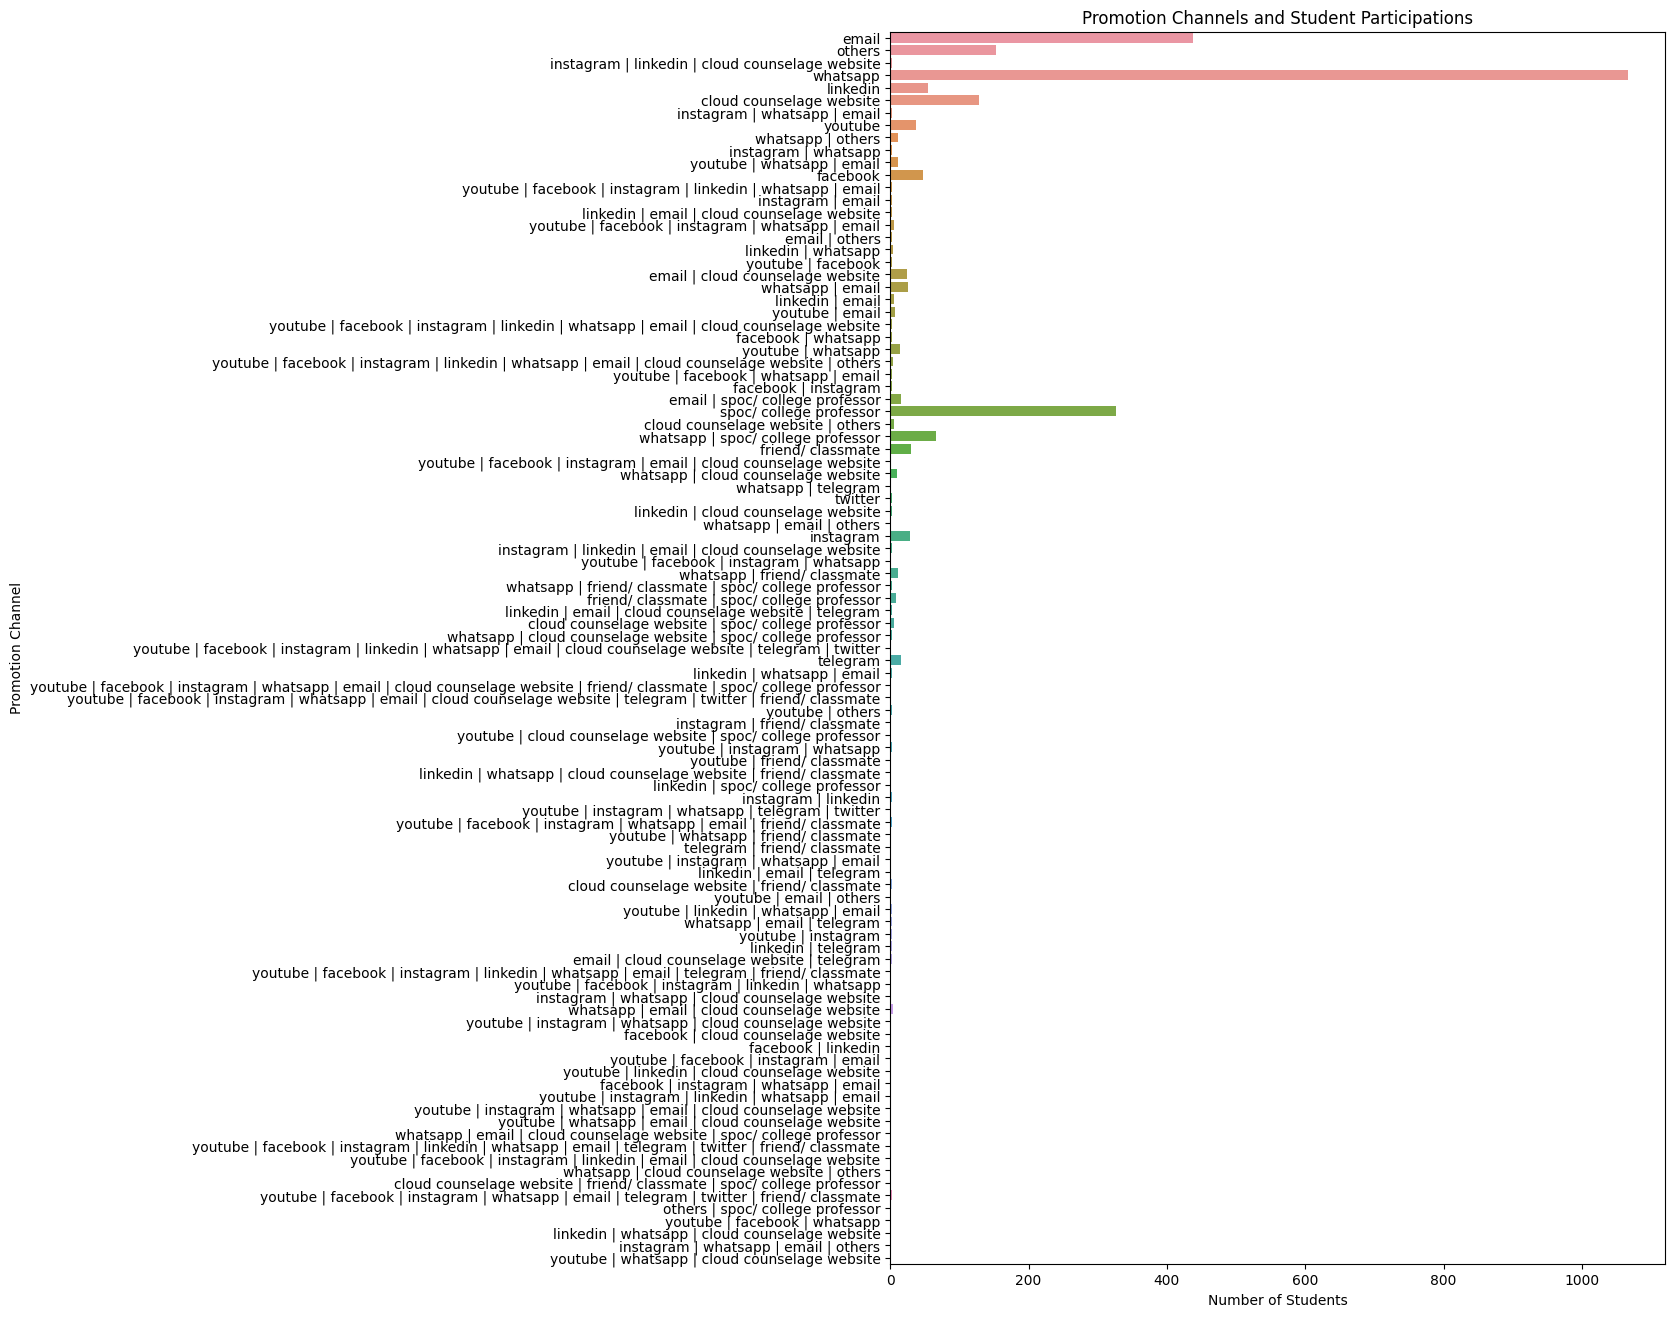

In [39]:
# 15. Which promotion channel brings in more student participations for the event?
plt.figure(figsize=(10, 16))
sns.countplot(data=data, y="How did you come to know about this event?")
plt.title("Promotion Channels and Student Participations")
plt.xlabel("Number of Students")
plt.ylabel("Promotion Channel")
plt.show()

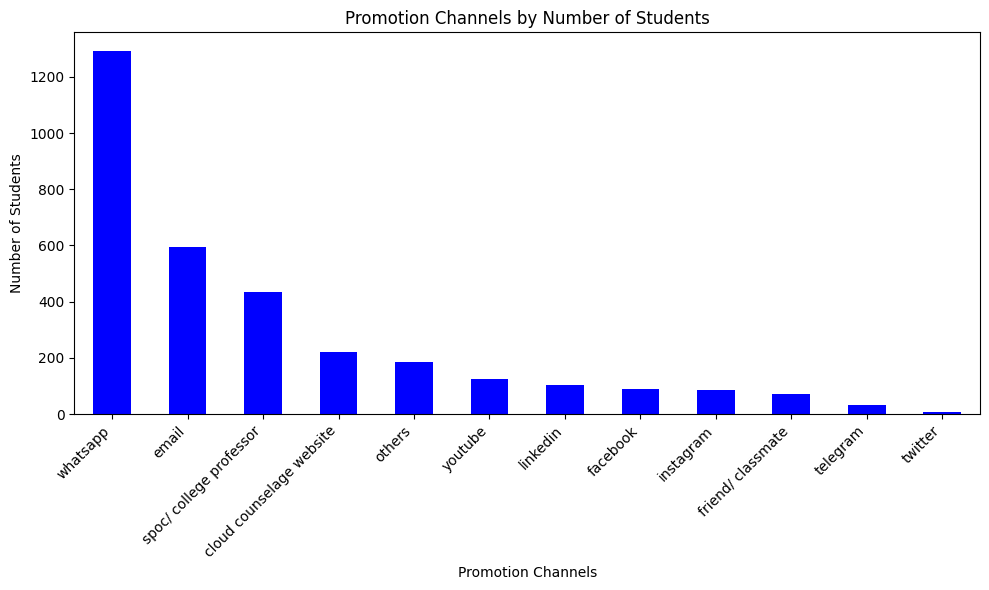

In [40]:
# Split values in the "How did you come to know about this event?" column and count promotion channels
column_name = "How did you come to know about this event?"
promotion_channels = data[column_name].str.split('|', expand=True).stack().str.strip().value_counts()
#print(promotion_channels)
# Create a bar plot to visualize promotion channels by number of students
plt.figure(figsize=(10, 6))
promotion_channels.plot(kind='bar', color='blue')
plt.title("Promotion Channels by Number of Students")
plt.xlabel("Promotion Channels")
plt.ylabel("Number of Students")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#**16. Find the total number of students who attended the events related to Data Science?**

In [41]:
# 16. Find the total number of students who attended the events related to Data Science?
data_science_related_events = ["Data Visualization using Power BI", "Hello ML and DL", "IS DATA SCIENCE FOR YOU?"]
data_science_attendees = data[data["Events"].isin(data_science_related_events)]["Email ID"].nunique()
print("Total number of students attended Data Science related events:", data_science_attendees)

Total number of students attended Data Science related events: 558


#**17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)**

In [42]:
# 17. Those who have high CGPA & More experience in language those who had high expectations for salary? (Avg)
high_cgpa_experience = data[(data["CGPA"] > 8.0) & (data["Experience with python (Months)"] > 5)]
avg_high_salary = high_cgpa_experience["Expected salary (Lac)"].mean()
print("Average expected salary for high CGPA and more experienced students:", avg_high_salary)

Average expected salary for high CGPA and more experienced students: 17.01996007984032


#**18. How many students know about the event from their colleges? Which of these Top 5 colleges?**

In [43]:
# 18. How many students know about the event from their colleges? Which of these Top 5 colleges?

# Filter rows where 'How did you come to know about this event?' contains 'other' and 'Specify in Others' contains 'college'
filtered_df = data[(data['How did you come to know about this event?'].str.contains('other')) &
                 (data['Specify in "Others" (how did you come to know about this event)'].str.contains('college'))]

# Group by college and count the occurrences
college_counts = filtered_df['College Name'].value_counts()

# Get the top 5 colleges with the most counts
top_colleges = college_counts.head(5)

print("Top 5 colleges with the most counts where 'other' is present and 'college' is in 'Specify in Others':")
print(top_colleges)

Top 5 colleges with the most counts where 'other' is present and 'college' is in 'Specify in Others':
wilson college                                             9
vidyalankar institute of technology, mumbai                5
government polytechnic gandhinagar                         5
g h raisoni institut of engineering and technology pune    5
vishwakarma institute of technology, pune                  5
Name: College Name, dtype: int64
